# Linear Regression With one Variable


The goal of this project is to estimate the profit of a shop in a city based on the population of that city.
Data specifications :

Input data: The population of that city (in units of 10,000 people)
Output data: Profit of that shop (with a unit of 10,000 dollars)

In [213]:
#load data set from a csv file
#import pandas libaray for reading a csv file
import pandas as pd
#import numpy
import numpy as np



#read data from project2-data1.csv file
data1 = pd.read_csv("/content/sample_data/project2-data1.csv")

#show a summary of data
data1.head()

,population(10K),profit(10K$)
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [214]:
#split the data into input X and output Y
#input feature
X = data1.values[:, 0]
#output
Y = data1.values[:, 1]

#find m
m = Y.shape[0]
print(m)

97


# Data Visualization:



In [173]:
#function for plotting data
import matplotlib.pyplot as plt
def plotData(x, y):
    plt.plot(x, y, 'ro', ms=10, mec='k')
    plt.ylabel('profit')
    plt.xlabel('population')


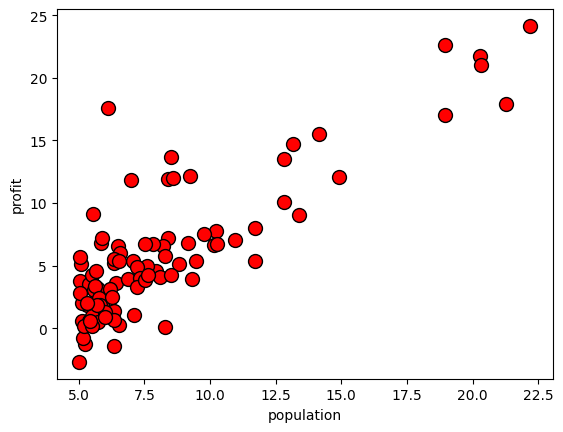

In [174]:
#Data visualization
plotData(X, Y)

In [175]:
#print shapes of X and Y
print("shape of X:", X.shape)
print("shape of Y:", Y.shape)


shape of X: (97,)
shape of Y: (97,)


# creating X and Y matrices with the right dimensions as shown in the slide


<p align="center" width="100%">
    <img width="50%" src="https://drive.google.com/uc?id=1wlGw9Mm6WJge83NeAtrn6jokvE6iShfU">
</p>

In [176]:
#convert X dimension from (m,) to (m, 1)
X = np.expand_dims(X, 1)
#Convert dimension X from (m, 1) to (1, m)
X = np.transpose(X)
X.shape

(1, 97)

In [177]:
#convert Y dimension from (m,) to (m, 1)
Y = np.expand_dims(Y, 1)
#Convert dimension Y from (m, 1) to (1, m)
Y = np.transpose(Y)
Y.shape

(1, 97)

In [178]:
#add x0=1 to all the data
X = np.concatenate([np.ones((1, m)), X], axis=0)
X.shape

(2, 97)

# cost function: vectorized implementation


<p align="center" width="100%">
    <img width="50%" src="https://drive.google.com/uc?id=1BV9HwTMy296EehEJnzMlMD-7kQMp6mCW">
</p>

In [179]:
#create a function for computing cost J
def computeCost(X, Y, thetatemp):
  m = X.shape[1]

  temp = np.matmul(np.transpose(thetatemp), X) - Y

  cost = np.matmul(temp, np.transpose(temp)) / (2*m)

  return cost


In [180]:
#initialize theta
theta = np.array([[0], [0]])
#use the function you created to compute J
cost = computeCost(X, Y, theta)
print("initial cost is:", cost)

initial cost is: [[32.07273388]]


# Gradient Descent: Vectorize implementation


<p align="center" width="100%">
    <img width="50%" src="https://drive.google.com/uc?id=1PC-RF-8u2G67eB2BLvlBWikPthLxqYoM">
</p>

In [181]:
#create a function for gradient descent
def gradientDescent(X, Y, thetatemp, lr, epochs):
  m = X.shape[1]
  J_history = []
  for epoch in range(epochs):
    temp = np.transpose(np.matmul(np.transpose(thetatemp), X) - Y)
    thetatemp = thetatemp - (lr/m) * np.matmul(X, temp)

    J_history.append(computeCost(X, Y, thetatemp)[0, 0])

  return thetatemp, J_history

In [182]:
#initialize theta and train linear regression
theta = np.array([[0], [0]])

#set epochs and learning rate
epochs = 1500
lr = 0.01
#run gradient descent and print theta
thetanew, J_history = gradientDescent(X, Y, theta, lr, epochs)
print(thetanew)



[[-3.63029144]
 [ 1.16636235]]


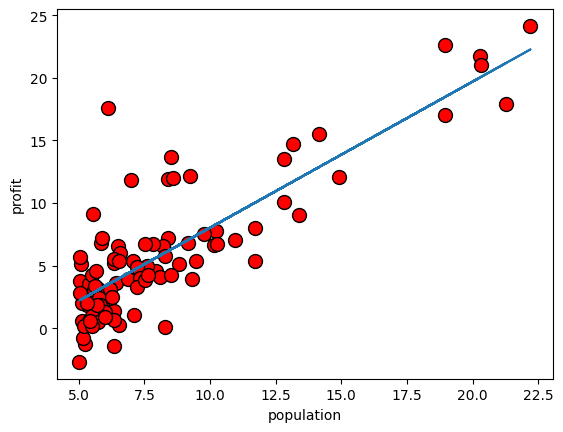

In [183]:
#plot the line that fits the data

#plot the original data
plotData(X[1, :], Y[0, :])

#plot the line
plt.plot(X[1, :], np.matmul(np.transpose(thetanew), X)[0,:])



In [184]:
#predict profit for different populations
#for population of 70000
profit = np.matmul(np.transpose(thetanew), np.array([[1], [7]]))
print("profit(10K$): ", profit)
print("profit($): ", profit*10000)

profit(10K$):  [[4.53424501]]
profit($):  [[45342.45012945]]


In [185]:
thetanew[0]*1 + thetanew[1] * 7

array([4.53424501])

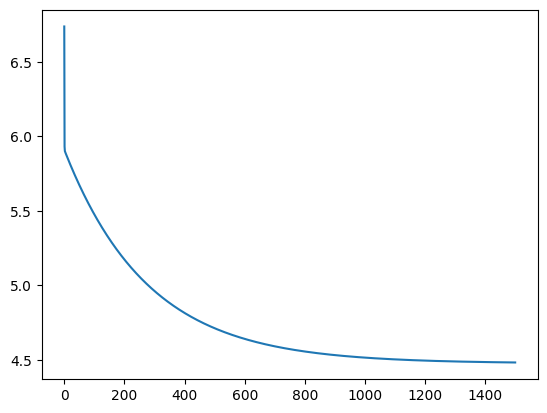

In [186]:
#visualizing cost J each iteration
plt.plot(J_history)

# Linear Regression with multiple features


predict price of the house using multiple input features


input featrues are size of the house and number of bedroomss




In [187]:
#load data set from a csv file
#import pandas libaray for reading a csv file
import pandas as pd
import numpy as np
#read data from project2-data2.csv file
data2 = pd.read_csv("/content/sample_data/project2-data2.csv")

#show a summary of data
data2.head()

,size,#bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [188]:
#split the data into input X and output Y
#input feature
X = data2.values[:, 0:2]

#output
Y = data2.values[:, 2]

#find m
m = Y.shape[0]
print(m)

47


# mean Normalization:

<p align="center" width="100%">
    <img width="50%" src="https://drive.google.com/uc?id=1OZfebBMmcG1woMpGg0ad3qDJ6Nd06Kh7">
</p>

In [189]:
def featureNormalize(X):
  X_norm = X.copy()
  mean = np.mean(X_norm, axis=0)
  range1 = np.max(X_norm, axis=0) - np.min(X_norm, axis=0)
  #we can also use standard deviation (sigma) instead of range = max - min
  #sigma = np.std(X_norm, axis=0)
  X_norm = (X_norm - mean)/(range1)
  #X_norm = (X_norm - mean)/(sigma)

  return X_norm, mean, range1

In [190]:
X_norm, mean, range1 = featureNormalize(X)
print("mean:", mean)
print("range1 :", range1)

mean: [2000.68085106    3.17021277]
range1 : [3626    4]


# Data Visualization:



In [191]:
#function for plotting data
import matplotlib.pyplot as plt
def plotData(x, y):
    plt.plot(x, y, 'ro', ms=10, mec='k')
    plt.ylabel('output')
    plt.xlabel('input')


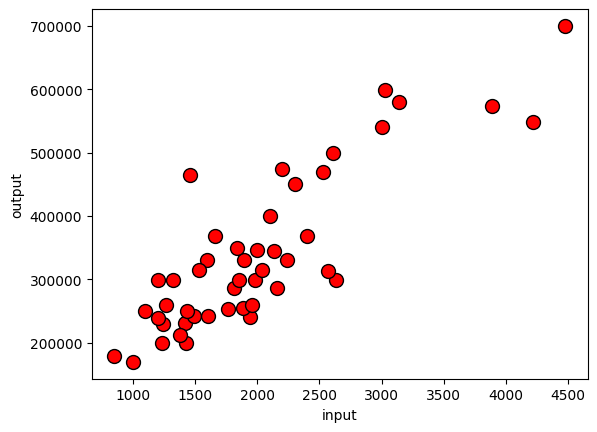

In [192]:
#Data visualization
#plot price-size before normalization
plotData(X[:,0], Y)

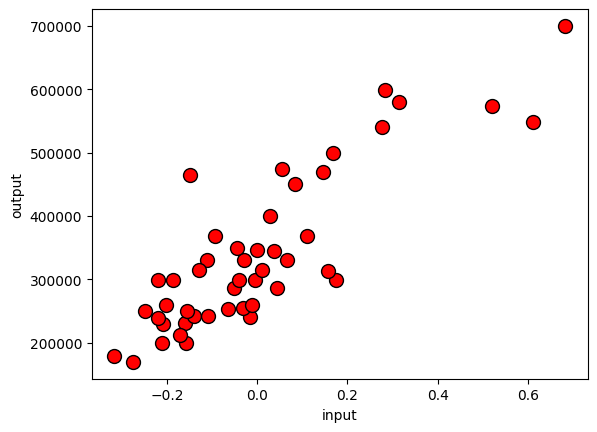

In [193]:
#Data visualization
#plot price-size after normalization
plotData(X_norm[:,0], Y)

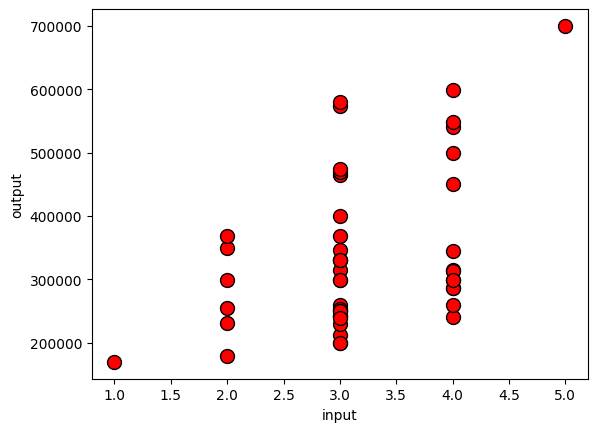

In [194]:
#Data visualization
#plot price-#bedroom before normalization
plotData(X[:,1], Y)

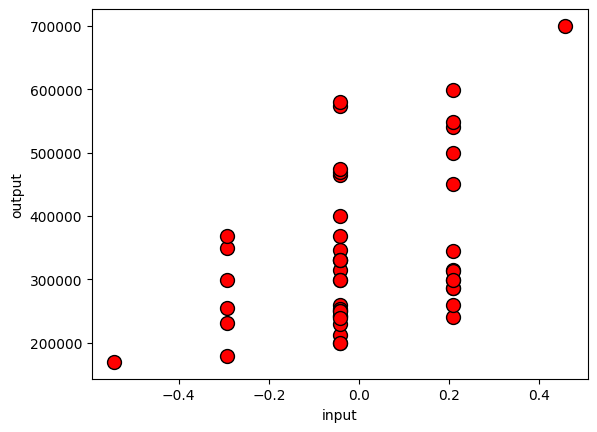

In [195]:
#Data visualization
#plot price-#bedroom after normalization
plotData(X_norm[:,1], Y)

# change the dimenson of matrices X and Y if necessary

<p align="center" width="100%">
    <img width="50%" src="https://drive.google.com/uc?id=1wlGw9Mm6WJge83NeAtrn6jokvE6iShfU">
</p>

In [196]:
print("shape of X_norm: ",X_norm.shape)
print("shape of Y: ",Y.shape)

shape of X_norm:  (47, 2)
shape of Y:  (47,)


In [197]:
#change the dimensions from (m x n) to (n x m)
X_norm = np.transpose(X_norm)
X_norm.shape

(2, 47)

In [198]:
#convert Y dimension from (m,) to (m, 1)
Y = np.expand_dims(Y, 1)
#Convert dimension Y from (m, 1) to (1, m)
Y = np.transpose(Y)
Y.shape

(1, 47)

In [199]:
print("shape of X_norm: ",X_norm.shape)
print("shape of Y: ",Y.shape)

shape of X_norm:  (2, 47)
shape of Y:  (1, 47)


In [200]:
#add x0=1 to all the data
import numpy as np
m = X_norm.shape[1]
X_norm = np.concatenate([np.ones((1, m)), X_norm], axis=0)
X_norm.shape

(3, 47)

In [201]:
#create a function for computing cost J
def computeCost(X, Y, thetatemp):
  m = X.shape[1]

  temp = np.matmul(np.transpose(thetatemp), X) - Y
  cost = (1/(2*m)) * np.matmul(temp, np.transpose(temp))

  return cost


In [202]:
#initialize theta
theta = np.array([[0], [0], [0]])
#sue the function computeCost to compute J
J = computeCost(X_norm, Y, theta)
print("cost with initial theta", J)

cost with initial theta [[6.55915481e+10]]


In [203]:
#create a function for gradient descent
def gradientDescent(X, Y, thetatemp, lr, num_epochs):
  m = X.shape[1]
  #use a python list to save cost every epoch
  J_history = []

  for epoch in range(num_epochs):
    temp = np.matmul(X, np.transpose(np.matmul(np.transpose(thetatemp), X) - Y))

    thetatemp = thetatemp - (lr/m)*temp
    J_history.append(computeCost(X, Y, thetatemp)[0,0])

  return thetatemp, J_history

In [204]:
#initialize theta and train linear regression
#set epochs and learning rate
theta = np.array([[-1], [0], [-1]])
epochs = 500
lr = 0.001
theta, J_history = gradientDescent(X_norm, Y, theta, lr, epochs)
print(theta)

[[133992.98386537]
 [ 11303.93463133]
 [  5037.79834439]]


In [205]:
#preidct values for features size=500 and #bedrooms=5
#first normalize the features
x1norm = (500-mean[0])/range1[0]
x2norm = (5-mean[1])/range1[1]
print("x1norm : ", x1norm)
print("x2norm : ", x2norm)
price = theta[0] + theta[1] * x1norm + theta[2] * x2norm
print("predicted price = ", price)

x1norm :  -0.4138667542922862
x2norm :  0.45744680851063835
predicted price =  [131619.18590333]


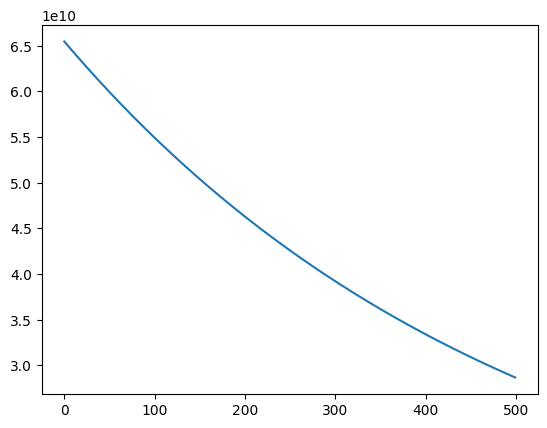

In [206]:
#visualizing cost J each iteration
plt.plot(J_history)

# Use scikit learn for linear regression

In [207]:
#load data set from a csv file
#import pandas libaray for reading a csv file
import pandas as pd
import numpy as np

#read data from project2-data2.csv file
data2 = pd.read_csv("/content/sample_data/project2-data2.csv")

#show a summary of data
data2.head()

,size,#bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [208]:
#split the data into input X and output Y
#input feature
X = data2.values[:, 0:2]

#output
Y = data2.values[:, 2]

#find m
m = Y.shape[0]


In [209]:
def featureNormalize(X):
  X_norm = X.copy()
  mean = np.mean(X_norm, axis=0)
  range1 = np.max(X_norm, axis=0) - np.min(X_norm, axis=0)
  #we can also use standard deviation (sigma) instead of range = max - min
  #sigma = np.std(X_norm, axis=0)
  X_norm = (X_norm - mean)/(range1)
  #X_norm = (X_norm - mean)/(sigma)

  return X_norm, mean, range1

In [210]:
X_norm, mean, range1 = featureNormalize(X)


In [211]:
from sklearn import linear_model

model = linear_model.SGDRegressor(loss='squared_error' ,
                                  fit_intercept=True,
                                  max_iter=5000,
                                  learning_rate='constant',
                                  eta0=0.001)
model.fit(X_norm, Y)

SGDRegressor(eta0=0.001, learning_rate='constant', max_iter=5000)

In [212]:
#predict for input size=500 and #bedrooms= 5
x1norm = (500-mean[0])/range1[0]
x2norm = (5-mean[1])/range1[1]
model.predict(np.array([[x1norm, x2norm]]))

array([130431.07792225])